# Week 2 Hypothesis Testing



In [2]:

# setup the presentation settings
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'start_slideshow_at': 'selected',
              'transition': 'fade'
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'fade'}

# Science and Hypothesis

- Last time we talked about probability.
- But we are not gamblers. We are SCIENTISTS. We want to learn about the world we live in...
- The scientific process:
  - Hypothesize something about the world
  - devise an experiment that can falsify it
  -  and see if the hypothesis still holds

So here comes hypothesis testing...

# Science and Hypothesis (continued)

Sometimes life is easy:
-  Hypothesis: all bacteria are good
-  But then we see pathogenic e. coli
-  So it falsifies our hypothesis. Back to the drawing board...

But usually it's not that easy to falsify an hypthesis:
- Hypothesis: sick people have e. coli
- and we test 10 people and see they all have e. coli
- what does it mean about our hypothesis? Is 10 enough? 100? 1000000?

We need the power of STATISTICS!

# What is a (statistical) hypothesis?

A statistical hypothesis is a hypothesis that is testable on the basis of observing a process that 
is modeled via a set of random variables.

In statistics, when we say hypothesis testing, we usually inquire if the evidence supports our hypothesis.

If so, to what degree?

# Bayesian and Frequentist Approaches

__Bayesian__: Given an observation X, what are the probabilities of the different hypothesis? Or sometimes, given a set of hypothesis, is there one which is one more likely than the other given the observation?

__Frequentist__: what is the probability of getting observation X under the null hypothesis $H_0$. If it is very low, we assume it is incorrect.

We will focus on Frequentist approach

# Frequentist Testing process - Informal Example

Say we have a coin and we want to test if it is fair or not.

Assume we flipped the coin 1000 times and observed 995 Heads. We would suspect that the coin has a bias towards giving Head vs. Tail.


# Frequentist Testing process - Example continued

So what is going on?

In our mind, there are two probable options, one is that the coin is fair ($P(H)=P(T)=0.5$) and the other is that the coin has some bias towards one side vs. the other (we don't know what bias exactly).

We can calculate the probabilities of the fair coin (exact null hypothesis), and based on the unfair model, we can say what result is more unfair than others...

# Frequentist Testing process - the ground is shaky

Say we flip a coin and we get:

HHTHHHHHHHTTHHHHHTHTHTHHTHTTH

looks relatively fair coin,


but if we translate to morse code (-=H, .=T)

--. --- --- -.. -- --- .-. -. .. -. --.

which means:
Good Morning!

So is it random? what is the probability of getting this by chance?

The probability of any single set of n coin flips is $2^{-n}$, but that doesn't help us.

We need to define what results are interesting (give an order to the results).

What about morse code for German? Where do we stop?

So we need some idea of the non-null hypothesis

# Sick vs Healthy simulation

Let's construct a simple example
- There are 200 people being surveyed
  - 100 of these people are healthy and the rest are sick
- Concentrations of H pylori are measured

- Is there a difference between sick and healthy people based on H pylori concentration?


In [85]:
import warnings   # running fast and loose
warnings.simplefilter("ignore") 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests
from numpy.random import normal, shuffle, permutation

%matplotlib inline

In [43]:
np.random.seed(0)    # set seed for the random numbers

In [44]:
sick_mean    = 8
healthy_mean = 5
variance     = 2
num_sick     = 100
num_healthy  = 100
sick_data    = np.random.normal(sick_mean, variance, num_sick)
healthy_data = np.random.normal(healthy_mean, variance, num_healthy)
data = pd.DataFrame({'group': ['sick']*num_sick + ['healthy']*num_healthy,
                     'H pylori': np.concatenate((sick_data, healthy_data))})

In [45]:
data.head(n=4)

,H pylori,group
0,11.528105,sick
1,8.800314,sick
2,9.957476,sick
3,12.481786,sick


In [46]:
data.tail(n=4)

,H pylori,group
196,6.543581,healthy
197,6.647008,healthy
198,9.326472,healthy
199,7.673056,healthy


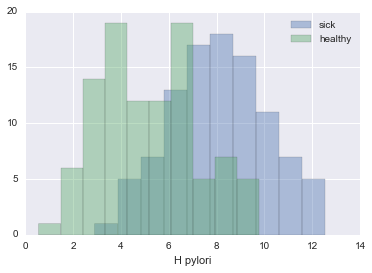

In [47]:
# Plot H pylori distribution for the sick group
sns.distplot(data.loc[data.group=='sick', 'H pylori'],     
             label='sick', kde=False, bins=10)
# Plot H pylori distribution for the healthy group
sns.distplot(data.loc[data.group=='healthy', 'H pylori'],
             label='healthy', kde=False, bins=10)
plt.legend()

What is our hypothesis?

The sick and healthy distributions have different means.

More precisely

$H_a: \mu_H \neq \mu_S$

$H_0: \mu_H= \mu_S$

H = Healthy

S = Sick

# What's the outcome


we get a p-value. what does it mean? 

The p-value is the probability of getting such a result or more extreme under the null hypothesis. If it is very low, we would like to reject the null hypothesis (say it is incorrect).

Note that a (relatively) high p-value does not indicate that the null hypothesis is true. just that we cannot rule it out (i.e. one coin toss). Especially since our $H_a$ model is not well defined.

what cutoff should we take?

0.05!

# False positive and false negative errors

False positive (type 1) - we reject the null hypothesis when in reality it is correct

$\alpha = P(reject\; H_0\; |\; H_0\; is\; True)$

False negative (type 2) - we don't reject the null hypothesis when in reality it is incorrect

$\beta = P(reject\; H_0\; |\; H_a\; is\; True)$


# False positive and false negative errors

<img src="files/type-i-and-type-ii-errors.jpg">

# Bad estimators
Always accept $H_0$  

$\alpha=0$ -> No Type I errors

Always reject $H_0$  

$\beta=0$ -> No Type II errors

The frequentist approach : control the Type I error, but little control over Type II error

# Sick vs healthy example (continued)

$H_a: \mu_H \neq \mu_S$  The means between sick and healthy are different

$H_0: \mu_H= \mu_S$ The means are the same

pvalue = the probability we acknowledge that sick and healthy are different given that they are the same

We will use the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) to estimate this probability
    

In [48]:
t, pvalue = ttest_ind(data.loc[data.group=='sick', 'H pylori'],
                      data.loc[data.group=='healthy', 'H pylori'])

In [49]:
t

10.179745677305018

In [50]:
pvalue

7.6431617406052428e-20

In [51]:
u, pvalue = mannwhitneyu(data.loc[data.group=='sick', 'H pylori'],
                         data.loc[data.group=='healthy', 'H pylori'])

In [52]:
u

1623.0

In [53]:
pvalue

7.9129312462118361e-17

# Effect Size problem

In [54]:
n = 100000
np.random.seed(0)    # set seed for the random numbers

data = pd.DataFrame({'group': ['healthy1']*n + ['healthy2']*n,
                     'H pylori': np.concatenate((np.random.normal(8.1, 2, n),
                                                 np.random.normal(8, 2, n)))})
t, pvalue = ttest_ind(data.loc[data.group=='healthy1', 'H pylori'],
                      data.loc[data.group=='healthy2', 'H pylori'])

In [15]:
t

10.4146543383201

In [16]:
pvalue

2.1577457502909888e-25

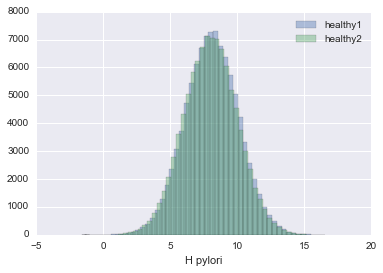

In [17]:
sns.distplot(data.loc[data.group=='healthy1', 'H pylori'],  # H pylori values for the sick group
             label='healthy1', kde=False)
sns.distplot(data.loc[data.group=='healthy2', 'H pylori'],  # H pylori values for the healthy group
             label='healthy2', kde=False)
plt.legend()

In [66]:
np.random.normal(50, 2, 10)

array([ 51.16801431,  50.489662  ,  47.78184689,  51.0718733 ,
        50.6418883 ,  50.19895205,  47.81829425,  49.5809913 ,
        47.12739567,  48.97192978])

pvalue 3.47871198237e-115


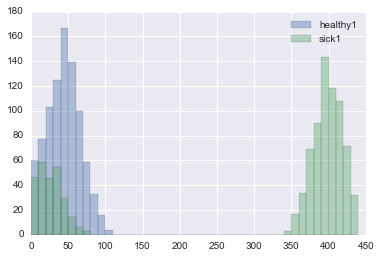

In [83]:
# big effect size, small pvalues
n_many = 700
n_few = 300

H1 = np.concatenate((np.random.normal(50, 20, size=n_many),
                     np.random.normal(10, 20, size=n_few)))
S1 = np.concatenate((np.random.normal(400, 20, size=n_many),
                     np.random.normal(20, 20, size=n_few)))

print('pvalue', mannwhitneyu(H1, S1).pvalue)
sns.distplot(H1, label='healthy1', kde=False, bins=np.arange(0,450,10))
sns.distplot(S1, label='sick1', kde=False, bins=np.arange(0,450,10))
plt.legend()

pvalue 4.36596450372e-225


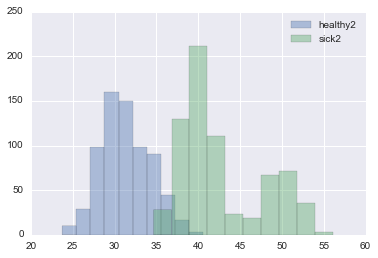

In [84]:
# small effect size, big pvalues
n_many = 500
n_few = 200
H2 = np.concatenate((np.random.normal(30, 2, n_many),
                     np.random.normal(35, 2, n_few)))
S2 = np.concatenate((np.random.normal(40, 2, n_many),
                     np.random.normal(50, 2, n_few)))
print('pvalue', mannwhitneyu(H2, S2).pvalue)

sns.distplot(H2, label='healthy2', kde=False, bins=10)
sns.distplot(S2, label='sick2', kde=False, bins=10)
plt.legend()

# Normality problem

In [18]:
np.random.seed(0)    # set seed for the random numbers
data = pd.DataFrame({'group': ['sick']*100 + ['healthy']*100,
                     'H pylori': np.concatenate((np.random.normal(8, 2, 100),
                                                 np.random.exponential(7, 100)))})

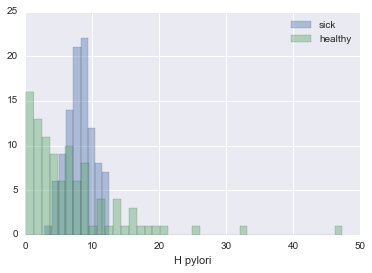

In [19]:
sns.distplot(data.loc[data.group=='sick', 'H pylori'],
             label='sick', kde=False)
sns.distplot(data.loc[data.group=='healthy', 'H pylori'], 
             label='healthy', kde=False, bins=40)
plt.legend()

In [20]:
t, pvalue = ttest_ind(data.loc[data.group=='sick', 'H pylori'],
                      data.loc[data.group=='healthy', 'H pylori'])

In [21]:
t

1.7283048631832336

In [22]:
pvalue

0.085492566172262571

In [23]:
u, pvalue = mannwhitneyu(data.loc[data.group=='sick', 'H pylori'],
                         data.loc[data.group=='healthy', 'H pylori'])

In [24]:
u

3142.0

In [25]:
pvalue

2.8315160121805506e-06

In [62]:
def permutation_ttest(df, num_permutations=99):
    ts = np.zeros(num_permutations)
    t, pvalue = ttest_ind(df.loc[df.group=='sick', 'H pylori'],
                          df.loc[df.group=='healthy', 'H pylori'])
    for i in range(num_permutations):
        df['group'] = np.random.permutation(df.group)
        t_, pvalue = ttest_ind(df.loc[df.group=='sick', 'H pylori'],
                               df.loc[df.group=='healthy', 'H pylori'])
        ts[i] = t_
    pvalue = (1 + (t >= ts).sum() )/ (num_permutations + 1)
    return pvalue

In [63]:
pvalue = permutation_ttest(data)
pvalue

0.01

# Multiple hypothesis testing problem

In [26]:
np.random.seed(0)    # set seed for the random numbers
data = pd.DataFrame({'group': ['sick']*100 + ['healthy']*100,
                     'H pylori': np.concatenate((np.random.normal(8, 2, 100),
                                                 np.random.normal(5, 2, 100)))})

In [27]:
num_healthy = 100
num_sick = 100
num_samples = num_healthy + num_sick
num_otus = 1000

otu_ids = np.arange(num_otus)  # simulated OTU ids
groups = pd.Series(['sick']*num_sick + ['healthy']*num_healthy)

# randomly grab 200 values uniformly distributed between (0, 10) for each OTU
random_data = pd.DataFrame({i: np.random.uniform(low=0.0, high=10.0, size=num_samples) for i in otu_ids})

In [28]:
stats = pd.DataFrame(index=otu_ids)
for i in otu_ids:
    t, pvalue = ttest_ind(random_data.loc[data.group=='sick', i],
                          random_data.loc[data.group=='healthy', i])
    stats.loc[i, 't'] = t
    stats.loc[i, 'pvalue'] = pvalue

In [29]:
stats.sort_values(by='pvalue').head()

,t,pvalue
240,3.494533,0.000586
986,3.160976,0.001819
63,2.821111,0.005273
278,2.766480,0.006203
457,2.741149,0.006683


Just by chance, there is a high chance that there is 1 OTU different between the 2 groups.

In [30]:
reject, pvals, sidak, bonf = multipletests(stats.pvalue)
stats['corrected pvalue'] = pvals
stats.sort_values(by='pvalue').head()

,t,pvalue,corrected pvalue
240,3.494533,0.000586,0.443493
986,3.160976,0.001819,0.837853
63,2.821111,0.005273,0.994890
278,2.766480,0.006203,0.997978
457,2.741149,0.006683,0.998742


# Compositionality problem

In [31]:
num_healthy = 100
num_sick = 100
num_samples = num_healthy + num_sick
num_otus = 1000
data = pd.DataFrame({i: np.random.uniform(low=0.0, high=10.0, size=num_samples) for i in otu_ids})

# Simulate a bloom.  OTU0 increases by a factor of 10 at each sample
data.loc[:, 0] = np.arange(num_samples) * 10

# normalize down to proportions.  See week1.sample.ipynb for further explanation.
data = data.apply(lambda x : x/x.sum(), axis=1)

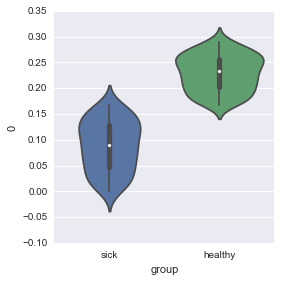

In [32]:
groups = pd.Series(['sick']*num_sick + ['healthy']*num_healthy)
data['group'] = groups
sns.factorplot(x='group', y=0, data=data, kind='violin')

In [33]:
stats = pd.DataFrame(index=otu_ids)
for i in otu_ids:
    t, pvalue = ttest_ind(data.loc[data.group=='sick', i],
                          data.loc[data.group=='healthy', i])
    stats.loc[i, 't'] = t
    stats.loc[i, 'pvalue'] = pvalue

# Multiple hypothesis tests
reject, pvals, sidak, bonf = multipletests(stats.pvalue)
stats['corrected pvalue'] = pvals

In [34]:
stats.sort_values(by='pvalue').head()    

,t,pvalue,corrected pvalue
0,-23.783951,6.015957e-60,0.000000
961,6.054930,6.936292e-09,0.000007
51,5.443586,1.534471e-07,0.000153
316,5.297452,3.112234e-07,0.000310
204,5.148588,6.308973e-07,0.000628


The main take away.  Every statistical test has its own set of assumptions. 

Other tests
- ANOVA
- Kruskal Wallis test
- Kolmogorov Smirnov test
- Permutation tests 
- Many many others